In [42]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [43]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [44]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [45]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

meta
0       {"cell.subset": "CD8+", "clone.id": "", "donor.MHC": "HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01", "donor.MHC.method": "", "epitope.id": "", "replica.id": "", "samples.found": 1, "structure.id": "", "studies.found": 1, "study.id": "", "subject.cohort": "HIV+", "subject.id": "005", "tissue": "PBMC"}
1       {"cell.subset": "CD8+", "clone.id": "", "donor.MHC": "HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01", "donor.MHC.method": "", "epitope.id": "", "replica.id": "", "samples.found": 1, "structure.id": "", "studies.found": 1, "study.id": "", "subject.cohort": "HIV+", "subject.id": "005", "tissue": "PBMC"}
2  {"cell.subset": "CD8+", "clone.id": "", "donor.MHC": "HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1", "donor.MHC.method": "", "epitope.id": "", "replica.id": "", "samples.found": 1, "structure.id": "", "studies.found": 1, "study.id": "", "subject.cohort": "HIV+", "subject.id": "065", "tissue": "PBMC"}

In [46]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

complex.id gene            cdr3           v.segm      j.segm      species  \
7           4  TRA   CAYRPPGTYKYIF  TRAV38-2/DV8*01   TRAJ40*01  HomoSapiens   
8           4  TRB  CASSALASLNEQFF        TRBV14*01  TRBJ2-1*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope antigen.gene antigen.species  \
7  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef           HIV-1   
8  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef           HIV-1   

   vdjdb.score                                               meta  
7            2  {"cell.subset": "CD8+", "clone.id": "", "donor...  
8            2  {"cell.subset": "CD8+", "clone.id": "", "donor...

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [48]:
df.dtypes

complex.id          int64
gene               object
cdr3               object
v.segm             object
j.segm             object
species            object
mhc.a              object
mhc.b              object
mhc.class          object
antigen.epitope    object
antigen.gene       object
antigen.species    object
vdjdb.score         int64
meta               object
dtype: object

In [49]:
df.shape

(92771, 14)

In [50]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(280, 14)

In [51]:
df.count()

complex.id         92771
gene               92771
cdr3               92771
v.segm             92670
j.segm             91626
species            92771
mhc.a              92771
mhc.b              92771
mhc.class          92771
antigen.epitope    92771
antigen.gene       92709
antigen.species    92771
vdjdb.score        92771
meta               92771
dtype: int64

### Dropping duplicate columns

In [52]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92491, 14)

### Dropping missing and null value

In [53]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm               99
j.segm             1141
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [54]:
df=df.dropna()
df.shape

(91274, 14)

**After dropping null value**
* Bulleted

In [55]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [56]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



complex.id gene             cdr3      v.segm      j.segm      species  \
5309           0  TRB  CASSKLASTAGEQYF    TRBV2*01  TRBJ2-7*01  HomoSapiens   
5310           0  TRB     CASSGGQETQYF   TRBV14*01  TRBJ2-5*01  HomoSapiens   
5311           0  TRB    CASSWDSNYGYTF  TRBV5-5*01  TRBJ1-2*01  HomoSapiens   

              mhc.a           mhc.b mhc.class   antigen.epitope antigen.gene  \
5309  HLA-DRA*01:01  HLA-DRB1*11:01     MHCII  DRFYKTLRAEQASQEV          Gag   
5310  HLA-DRA*01:01  HLA-DRB1*01:01     MHCII   LNKIVRMYSPTSILD          Gag   
5311  HLA-DRA*01:01  HLA-DRB1*01:01     MHCII  DRFYKTLRAEQASQEV          Gag   

     antigen.species  vdjdb.score  \
5309           HIV-1            1   
5310           HIV-1            1   
5311           HIV-1            1   

                                                   meta  
5309  {"cell.subset": "CD8+", "clone.id": "", "donor...  
5310  {"cell.subset": "CD8+", "clone.id": "", "donor...  
5311  {"cell.subset": "CD8+", "clone.id": "", "donor...

In [57]:
# remove all the data with 0 complex.id
df = df[df['complex.id'] != 0]

In [58]:
df

complex.id gene                  cdr3       v.segm      j.segm  \
0               1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1               1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
3               2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4               2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
6               3  TRB  CASSYEPGQVSHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
...           ...  ...                   ...          ...         ...   
92766       30592  TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01   
92767       30593  TRA          CAPQGATNKLIF  TRAV12-2*01   TRAJ32*01   
92768       30593  TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01   
92769       30594  TRA        CLVGGSGGYNKLIF     TRAV4*01    TRAJ4*01   
92770       30594  TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01   

           species           mhc.a           mhc.b mhc.class antigen.epitope  \
0      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
1      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
3      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
4      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
6      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
...            ...             ...             ...       ...             ...   
92766  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92767  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92768  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92769  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92770  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   

      antigen.gene antigen.species  vdjdb.score  \
0              Nef           HIV-1            2   
1              Nef           HIV-1            2   
3              Nef           HIV-1            2   
4              Nef           HIV-1            2   
6              Nef           HIV-1            2   
...            ...             ...          ...   
92766       Gluten           Wheat            0   
92767       Gluten           Wheat            2   
92768       Gluten           Wheat            2   
92769       Gluten           Wheat            0   
92770       Gluten           Wheat            0   

                                                    meta  
0      {"cell.subset": "CD8+", "clone.id": "", "donor...  
1      {"cell.subset": "CD8+", "clone.id": "", "donor...  
3      {"cell.subset": "CD8+", "clone.id": "", "donor...  
4      {"cell.subset": "CD8+", "clone.id": "", "donor...  
6      {"cell.subset": "CD8+", "clone.id": "", "donor...  
...                                                  ...  
92766  {"cell.subset": "CD4+", "clone.id": "", "donor...  
92767  {"cell.subset": "CD4+", "clone.id": "", "donor...  
92768  {"cell.subset": "CD4+", "clone.id": "", "donor...  
92769  {"cell.subset": "CD4+", "clone.id": "", "donor...  
92770  {"cell.subset": "CD4+", "clone.id": "", "donor...  

[60293 rows x 14 columns]

##  TCRDist3

In [59]:
# df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [60]:
# df_dash.head(3)

## Installing tcrdist3 package ##

In [61]:
# pip install tcrdist3
# installing tcrdist3

In [62]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [63]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [64]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [65]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [66]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene','antigen.species']]

In [67]:
df.head(3)

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   

       species antigen.epitope antigen.gene antigen.species  
0  HomoSapiens        FLKEKGGL          Nef           HIV-1  
1  HomoSapiens        FLKEKGGL          Nef           HIV-1  
3  HomoSapiens        FLKEKGGL          Nef           HIV-1

# Separating data set in to alpha and beta dataframe

In [68]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
# df = pd.concat([df_alpha, df_beta], ignore_index=True)
# df

In [69]:
df_alpha.reset_index(drop=True, inplace=True)
df_beta.reset_index(drop=True, inplace=True)
df.reset_index(drop=True,inplace=True)

In [70]:
df_alpha

complex.id gene       cdr3_a_aa         v_a_gene   j_a_gene  \
0               1  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
1               2  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
2               4  TRA   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01   
3               5  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
4               6  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
...           ...  ...             ...              ...        ...   
29814       30590  TRA   CMDEGGSNYKLTF      TRAV26-1*01  TRAJ53*01   
29815       30591  TRA     CSLYNNNDMRF      TRAV26-1*01  TRAJ43*01   
29816       30592  TRA   CALSTDSWGKLQF         TRAV6*01  TRAJ24*01   
29817       30593  TRA    CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01   
29818       30594  TRA  CLVGGSGGYNKLIF         TRAV4*01   TRAJ4*01   

           species        epitope antigen.gene antigen.species  
0      HomoSapiens       FLKEKGGL          Nef           HIV-1  
1      HomoSapiens       FLKEKGGL          Nef           HIV-1  
2      HomoSapiens       FLKEKGGL          Nef           HIV-1  
3      HomoSapiens       FLKEQGGL          Nef           HIV-1  
4      HomoSapiens       FLKEQGGL          Nef           HIV-1  
...            ...            ...          ...             ...  
29814  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat  
29815  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat  
29816  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  
29817  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  
29818  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  

[29819 rows x 9 columns]

In [71]:
df_beta

complex.id gene             cdr3_b_aa     v_b_gene    j_b_gene  \
0               1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
1               2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2               3  TRB  CASSYEPGQVSHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
3               4  TRB        CASSALASLNEQFF    TRBV14*01  TRBJ2-1*01   
4               5  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
...           ...  ...                   ...          ...         ...   
30469       30590  TRB         CASSVRSTDTQYF   TRBV7-2*01  TRBJ2-3*01   
30470       30591  TRB         CASSLRYTDTQYF   TRBV7-2*01  TRBJ2-3*01   
30471       30592  TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01   
30472       30593  TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01   
30473       30594  TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01   

           species        epitope antigen.gene antigen.species  
0      HomoSapiens       FLKEKGGL          Nef           HIV-1  
1      HomoSapiens       FLKEKGGL          Nef           HIV-1  
2      HomoSapiens       FLKEKGGL          Nef           HIV-1  
3      HomoSapiens       FLKEKGGL          Nef           HIV-1  
4      HomoSapiens       FLKEQGGL          Nef           HIV-1  
...            ...            ...          ...             ...  
30469  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat  
30470  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat  
30471  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  
30472  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  
30473  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat  

[30474 rows x 9 columns]

In [72]:
df_alpha['species'].unique()

array(['HomoSapiens', 'MusMusculus'], dtype=object)

# Removing mouse and monkey

In [73]:
df = df[~df['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [74]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [75]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27638 entries, 0 to 29818
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       27638 non-null  int64 
 1   gene             27638 non-null  object
 2   cdr3_a_aa        27638 non-null  object
 3   v_a_gene         27638 non-null  object
 4   j_a_gene         27638 non-null  object
 5   species          27638 non-null  object
 6   epitope          27638 non-null  object
 7   antigen.gene     27638 non-null  object
 8   antigen.species  27638 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


## Dropping null values

In [76]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())
df_beta=df_beta.dropna()

complex.id         0
gene               0
cdr3_a_aa          0
v_a_gene           0
j_a_gene           0
species            0
epitope            0
antigen.gene       0
antigen.species    0
dtype: int64


## Dropping duplicates

In [77]:
df_alpha=df_alpha.drop_duplicates()
df_beta=df_beta.drop_duplicates()
df=df.drop_duplicates()
df.shape

(55865, 9)

## Run TCRDist on alpha gene dataset

In [78]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/277 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 3)	-1
  (0, 5)	-1
  (0, 7)	-1
  (0, 6975)	48
  (0, 17076)	48
  (1, 1)	-1
  (1, 4)	-1
  (1, 6)	-1
  (1, 8)	-1
  (1, 3951)	45
  (1, 8210)	36
  (1, 10645)	38
  (1, 11480)	21
  (1, 11616)	36
  (1, 12197)	36
  (1, 14686)	45
  (1, 15968)	47
  (1, 18156)	50
  (1, 25430)	12
  (1, 26955)	44
  (1, 27250)	47
  (1, 27251)	47
  (1, 27254)	47
  (2, 2)	-1
  :	:
  (27637, 20948)	48
  (27637, 21424)	48
  (27637, 21614)	36
  (27637, 22267)	21
  (27637, 23186)	21
  (27637, 23189)	45
  (27637, 23242)	48
  (27637, 23250)	48
  (27637, 23405)	36
  (27637, 24356)	24
  (27637, 24357)	24
  (27637, 24359)	36
  (27637, 25339)	48
  (27637, 25536)	48
  (27637, 26262)	24
  (27637, 26598)	36
  (27637, 26653)	48
  (27637, 26993)	48
  (27637, 27404)	48
  (27637, 27413)	48
  (27637, 27514)	36
  (27637, 27611)	9
  (27637, 27612)	-1
  (27637, 27613)	-1
  (27637, 27637)	-1


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/283 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 1)	39
  (0, 2)	36
  (0, 4)	-1
  (0, 5)	39
  (0, 6)	36
  (0, 7)	-1
  (0, 8)	39
  (0, 9)	36
  (0, 10)	-1
  (0, 11)	39
  (0, 12)	36
  (1, 0)	39
  (1, 1)	-1
  (1, 2)	39
  (1, 4)	39
  (1, 5)	-1
  (1, 6)	39
  (1, 7)	39
  (1, 8)	-1
  (1, 9)	39
  (1, 10)	39
  (1, 11)	-1
  (1, 12)	39
  (2, 0)	36
  :	:
  (28226, 2968)	48
  (28226, 3938)	48
  (28226, 5674)	43
  (28226, 6407)	36
  (28226, 7295)	48
  (28226, 7661)	36
  (28226, 8154)	48
  (28226, 8552)	36
  (28226, 8949)	36
  (28226, 9068)	48
  (28226, 9144)	36
  (28226, 9364)	48
  (28226, 9458)	48
  (28226, 9750)	36
  (28226, 10312)	36
  (28226, 12239)	48
  (28226, 13596)	33
  (28226, 15984)	48
  (28226, 16227)	47
  (28226, 16243)	48
  (28226, 19728)	42
  (28226, 21434)	48
  (28226, 21876)	24
  (28226, 22787)	42
  (28226, 28226)	-1


In [79]:
# combine the alpha chain and beta chain
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
df_merge.shape

(27550, 19)

In [80]:
df_merge

complex.id gene_x       cdr3_a_aa         v_a_gene   j_a_gene  \
0               1    TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
1               2    TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
2               4    TRA   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01   
3               5    TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
4               6    TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
...           ...    ...             ...              ...        ...   
27545       30590    TRA   CMDEGGSNYKLTF      TRAV26-1*01  TRAJ53*01   
27546       30591    TRA     CSLYNNNDMRF      TRAV26-1*01  TRAJ43*01   
27547       30592    TRA   CALSTDSWGKLQF         TRAV6*01  TRAJ24*01   
27548       30593    TRA    CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01   
27549       30594    TRA  CLVGGSGGYNKLIF         TRAV4*01   TRAJ4*01   

         species_x      epitope_x antigen.gene_x antigen.species_x  count_x  \
0      HomoSapiens       FLKEKGGL            Nef             HIV-1        1   
1      HomoSapiens       FLKEKGGL            Nef             HIV-1        1   
2      HomoSapiens       FLKEKGGL            Nef             HIV-1        1   
3      HomoSapiens       FLKEQGGL            Nef             HIV-1        1   
4      HomoSapiens       FLKEQGGL            Nef             HIV-1        1   
...            ...            ...            ...               ...      ...   
27545  HomoSapiens   PQPELPYPQPQL         Gluten             Wheat        1   
27546  HomoSapiens   PQPELPYPQPQL         Gluten             Wheat        1   
27547  HomoSapiens  PQQPFPQPEQPFP         Gluten             Wheat        1   
27548  HomoSapiens  PQQPFPQPEQPFP         Gluten             Wheat        1   
27549  HomoSapiens  PQQPFPQPEQPFP         Gluten             Wheat        1   

      gene_y             cdr3_b_aa     v_b_gene    j_b_gene    species_y  \
0        TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01  HomoSapiens   
1        TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01  HomoSapiens   
2        TRB        CASSALASLNEQFF    TRBV14*01  TRBJ2-1*01  HomoSapiens   
3        TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01  HomoSapiens   
4        TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01  HomoSapiens   
...      ...                   ...          ...         ...          ...   
27545    TRB         CASSVRSTDTQYF   TRBV7-2*01  TRBJ2-3*01  HomoSapiens   
27546    TRB         CASSLRYTDTQYF   TRBV7-2*01  TRBJ2-3*01  HomoSapiens   
27547    TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01  HomoSapiens   
27548    TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01  HomoSapiens   
27549    TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01  HomoSapiens   

           epitope_y antigen.gene_y antigen.species_y  count_y  
0           FLKEKGGL            Nef             HIV-1        1  
1           FLKEKGGL            Nef             HIV-1        1  
2           FLKEKGGL            Nef             HIV-1        1  
3           FLKEQGGL            Nef             HIV-1        1  
4           FLKEQGGL            Nef             HIV-1        1  
...              ...            ...               ...      ...  
27545   PQPELPYPQPQL         Gluten             Wheat        1  
27546   PQPELPYPQPQL         Gluten             Wheat        1  
27547  PQQPFPQPEQPFP         Gluten             Wheat        1  
27548  PQQPFPQPEQPFP         Gluten             Wheat        1  
27549  PQQPFPQPEQPFP         Gluten             Wheat        1  

[27550 rows x 19 columns]

In [81]:
df_merge.drop(['species_y'], axis=1, inplace=True)
df_merge.drop(['antigen.species_y'], axis=1, inplace=True)

In [82]:
df_merge.species_x.value_counts()

HomoSapiens    27550
Name: species_x, dtype: int64

In [83]:
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr.cpus=2
tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

In [84]:
combined_rw_distance = tr.rw_alpha + tr.rw_beta

In [111]:
combined_rw_distance.shape

(27550, 27550)

# Calculate Radius part(not done)

In [85]:
# import os
# import numpy as np
# import pandas as pd
# from tcrdist.repertoire import TCRrep
# from tcrdist.sample import _default_sampler
# from tcrdist.background import get_stratified_gene_usage_frequency
# from tcrdist.centers import calc_radii
# from tcrdist.public import _neighbors_sparse_variable_radius, _neighbors_variable_radius
# from tcrdist.public import TCRpublic
# from tcrdist.ecdf import _plot_manuscript_ecdfs
# import matplotlib.pyplot as plt
# from tcrsampler.setup_db import install_all_next_gen;

In [86]:
# install_all_next_gen(dry_run = False)
# df_test = df_beta.query('epitope == "PA"').\
#     reset_index(drop = True)

# tr = TCRrep(cell_df = df_test.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus=2
# ts = _default_sampler(organism = "human", chain = "beta")()
# ts = get_stratified_gene_usage_frequency(ts = ts, replace = True)

In [87]:
# df_vj_background = tr.synthesize_vj_matched_background(ts = ts, chain = 'beta')
# trb = TCRrep(cell_df = df_vj_background.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus = 2
# radii, thresholds, ecdfs = \
#     calc_radii(tr = tr, 
#         tr_bkgd = trb, 
#         chain = 'beta', 
#         ctrl_bkgd = 10**-5, 
#         use_sparse = True, 
#         max_radius=50)
# # tr.clone_df['radius'] = radii
# # tr.clone_df['radius'][tr.clone_df['radius'] > 26] = 26

In [88]:
# tr.clone_df['neighbors'] = _neighbors_variable_radius(
#     pwmat = tr.pw_beta, 
#     radius_list = tr.clone_df['radius'])

# Visualize part

In [89]:
# pip install umap-learn

In [90]:
df_alpha

complex.id gene       cdr3_a_aa         v_a_gene   j_a_gene  \
0               1  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
1               2  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
2               4  TRA   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01   
3               5  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01   
4               6  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   
...           ...  ...             ...              ...        ...   
29814       30590  TRA   CMDEGGSNYKLTF      TRAV26-1*01  TRAJ53*01   
29815       30591  TRA     CSLYNNNDMRF      TRAV26-1*01  TRAJ43*01   
29816       30592  TRA   CALSTDSWGKLQF         TRAV6*01  TRAJ24*01   
29817       30593  TRA    CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01   
29818       30594  TRA  CLVGGSGGYNKLIF         TRAV4*01   TRAJ4*01   

           species        epitope antigen.gene antigen.species  count  
0      HomoSapiens       FLKEKGGL          Nef           HIV-1      1  
1      HomoSapiens       FLKEKGGL          Nef           HIV-1      1  
2      HomoSapiens       FLKEKGGL          Nef           HIV-1      1  
3      HomoSapiens       FLKEQGGL          Nef           HIV-1      1  
4      HomoSapiens       FLKEQGGL          Nef           HIV-1      1  
...            ...            ...          ...             ...    ...  
29814  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat      1  
29815  HomoSapiens   PQPELPYPQPQL       Gluten           Wheat      1  
29816  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat      1  
29817  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat      1  
29818  HomoSapiens  PQQPFPQPEQPFP       Gluten           Wheat      1  

[27638 rows x 10 columns]

In [116]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
combined_reduced = svd.fit_transform(combined_rw_distance)

In [117]:
combined_reduced.shape

(27550, 2)

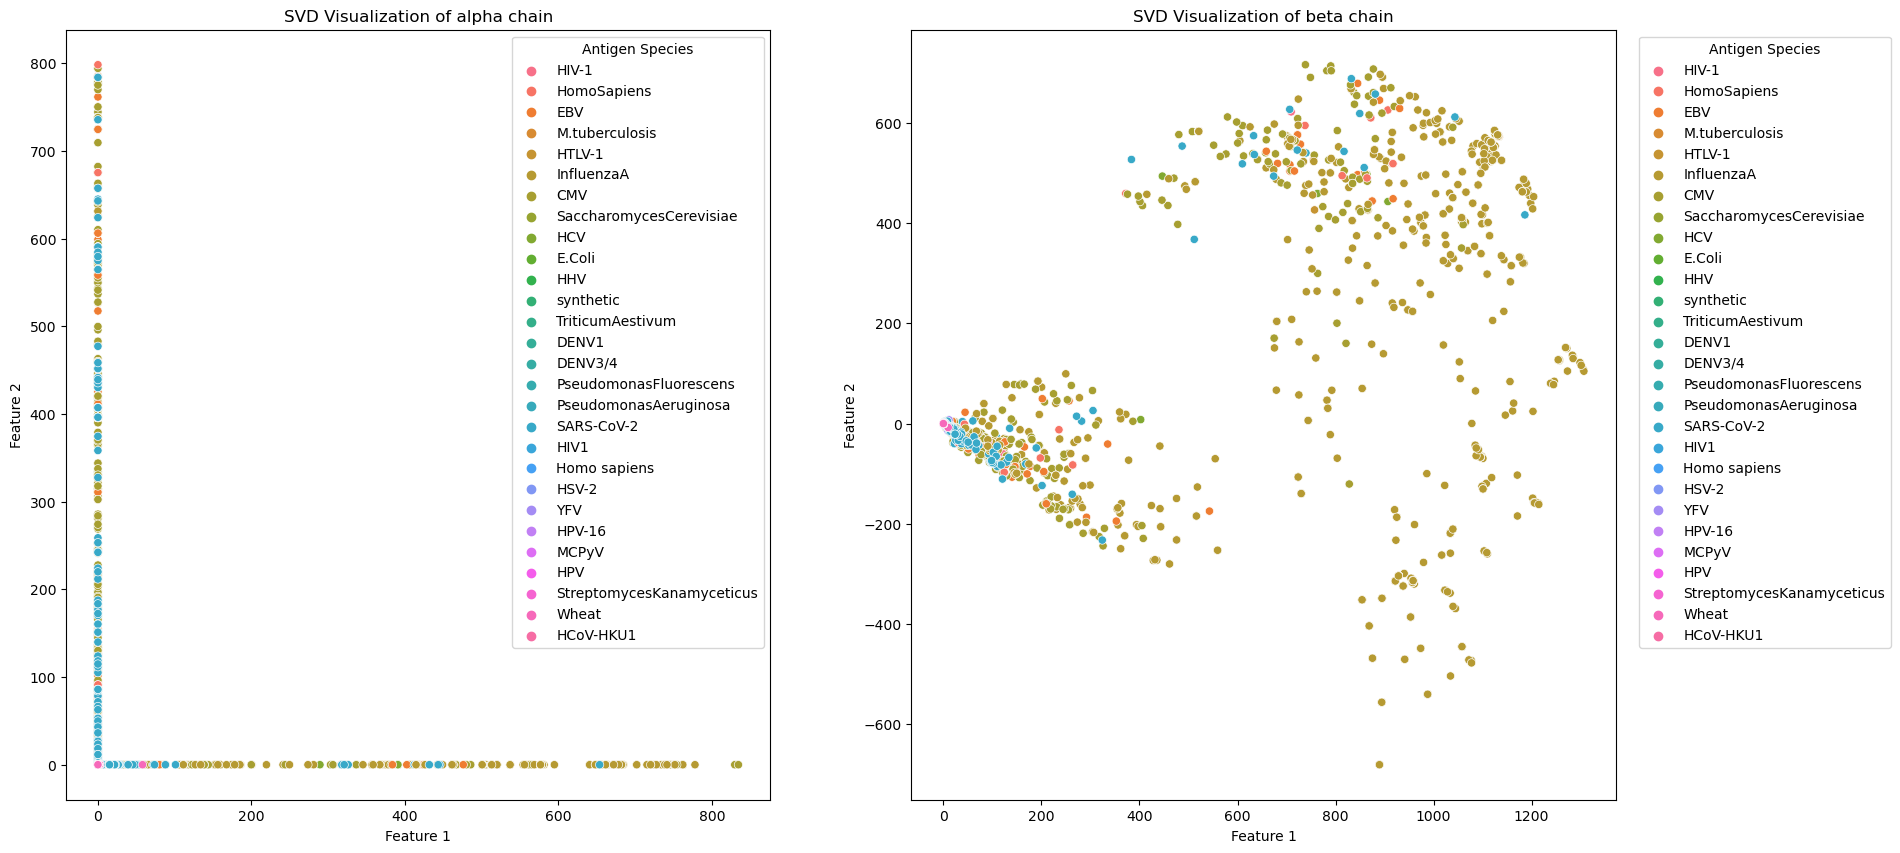

In [93]:
# SVD Visualization for alpha chain and beta chain
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x=alpha_reduced[:, 0], y=alpha_reduced[:, 1], hue=df_alpha['antigen.species'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('SVD Visualization of alpha chain')

sns.scatterplot(x=beta_reduced[:, 0], y=beta_reduced[:, 1], hue=df_beta['antigen.species'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('SVD Visualization of beta chain')

# add legend
ax[0].legend(loc='upper right', bbox_to_anchor=(1,1),title='Antigen Species')
ax[1].legend(loc='upper right', bbox_to_anchor=(1.4,1),title='Antigen Species')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

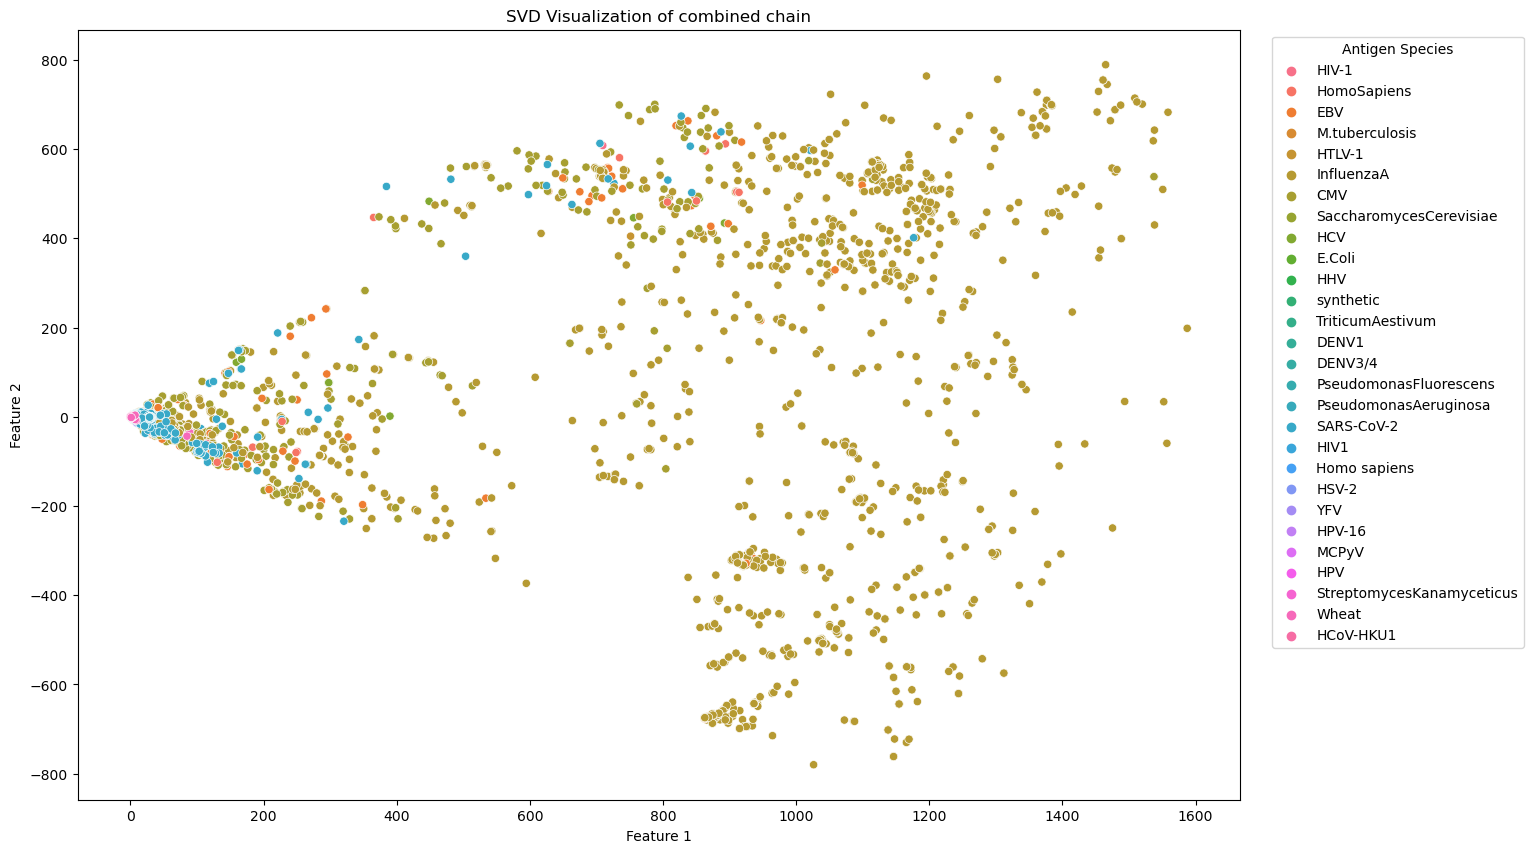

In [125]:
fig, ax0 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=combined_reduced[:, 0], y=combined_reduced[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')
plt.show

In [94]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
svd = TruncatedSVD(n_components=50)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
combined_reduced = svd.fit_transform(combined_rw_distance)
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.22541911, 0.05612372, 0.01976728, 0.01841372, 0.01736622,
       0.01467963, 0.00992628, 0.00920866, 0.00805977, 0.00764987,
       0.00734595, 0.00612622, 0.00521461, 0.00500464, 0.00499249,
       0.0045298 , 0.00482314, 0.00430079, 0.00417615, 0.00389495,
       0.00388557, 0.00385747, 0.00367268, 0.00347311, 0.00332961,
       0.00311746, 0.0030491 , 0.00299843, 0.00299046, 0.00293583,
       0.00267946, 0.00240919, 0.00246886, 0.0024459 , 0.00240748,
       0.00235784, 0.00205949, 0.00196969, 0.00195835, 0.00192138,
       0.00189814, 0.00186669, 0.00186571, 0.00185488, 0.00179807,
       0.00172748, 0.00171828, 0.00169025, 0.00167222, 0.00161006])

In [95]:
alpha_reduced

array([[ 7.18178448e-07,  1.51217586e-09,  5.35603068e-09, ...,
         1.13115968e-04, -3.83155076e-04, -5.50860845e-05],
       [ 5.57110403e-05,  6.03157169e-06,  5.82819398e-05, ...,
        -5.84432809e-03,  2.72770386e-02,  1.78193473e-02],
       [ 1.61617442e-06,  1.45822504e-05,  4.52254799e-04, ...,
        -1.48907497e-01,  1.85600491e-01,  6.22188087e-01],
       ...,
       [ 2.62799451e-05,  8.60301903e-05,  2.43612258e-04, ...,
        -1.74085694e-02, -3.94632299e-02, -1.54192031e-02],
       [ 1.26390216e-03,  3.40303902e-02,  2.44831482e+02, ...,
         2.44357754e+01,  2.22698981e+01,  1.84572000e+00],
       [ 3.23589551e-04,  2.85500603e-06,  2.83316482e-04, ...,
         1.91672600e-01, -3.17753024e-01, -3.55112517e-02]])

In [96]:
#using Tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
A_tsne = tsne.fit_transform(alpha_reduced)
B_tsne = tsne.fit_transform(beta_reduced)
# using UMAP
from umap import UMAP
umap = UMAP(n_components=2, random_state=42)
A_umap = umap.fit_transform(alpha_reduced)
B_umap = umap.fit_transform(beta_reduced)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed

In [97]:
# Instantiated Tsne for combined chain
C_tsne=tsne.fit_transform(combined_reduced)

In [98]:
# Instantiated Umap for combined chain
C_umap=umap.fit_transform(combined_reduced)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [99]:
from sklearn.decomposition import PCA

# 创建PCA对象，设置要降维的目标维度为2
pca = PCA(n_components=2)

# 对稀疏矩阵进行PCA降维
A_pca = pca.fit_transform(alpha_reduced)
B_pca= pca.fit_transform(beta_reduced)

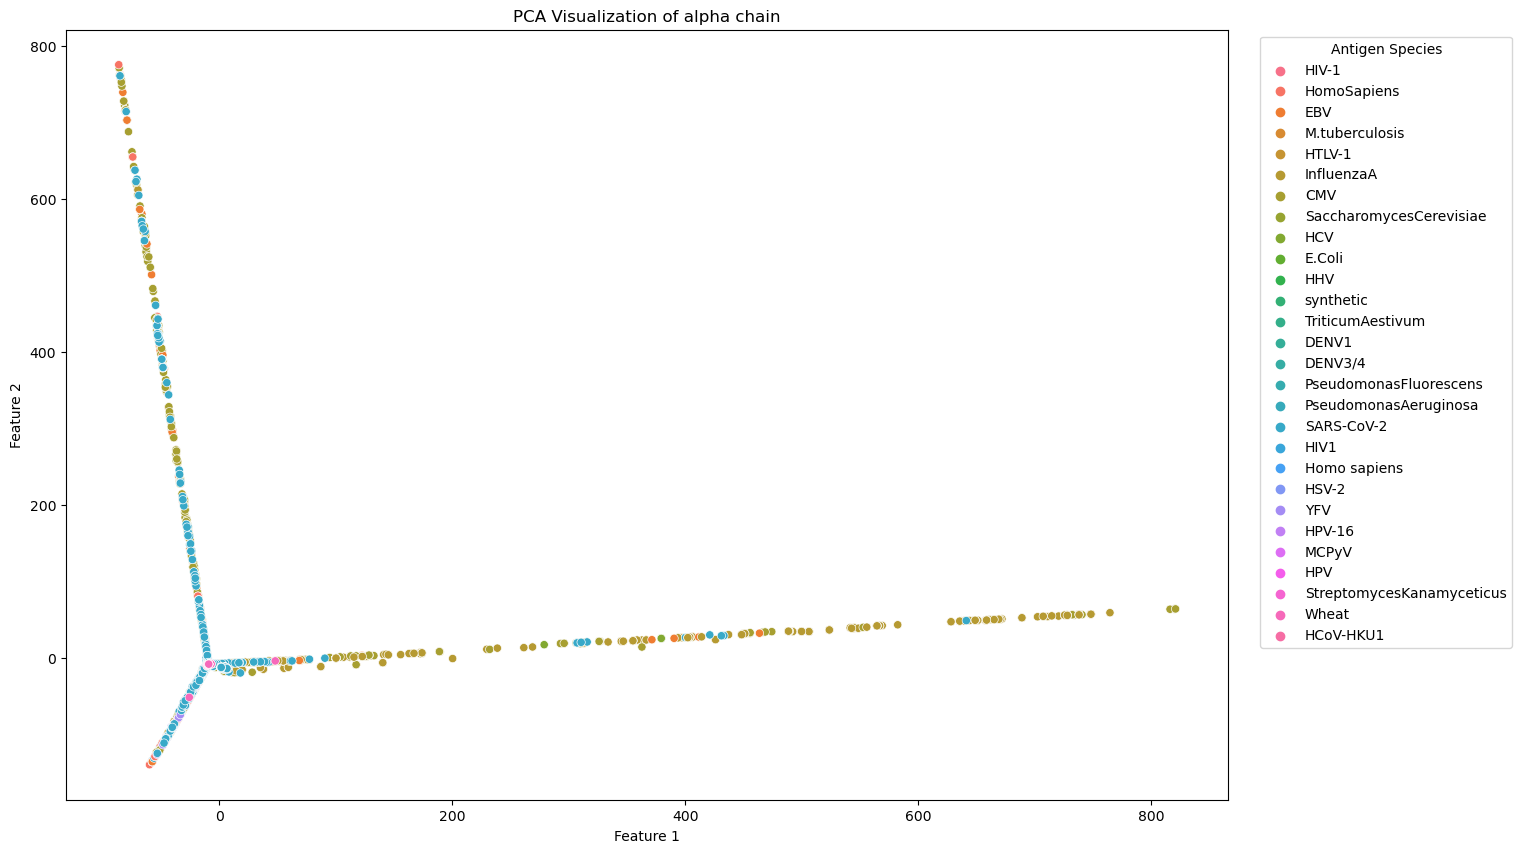

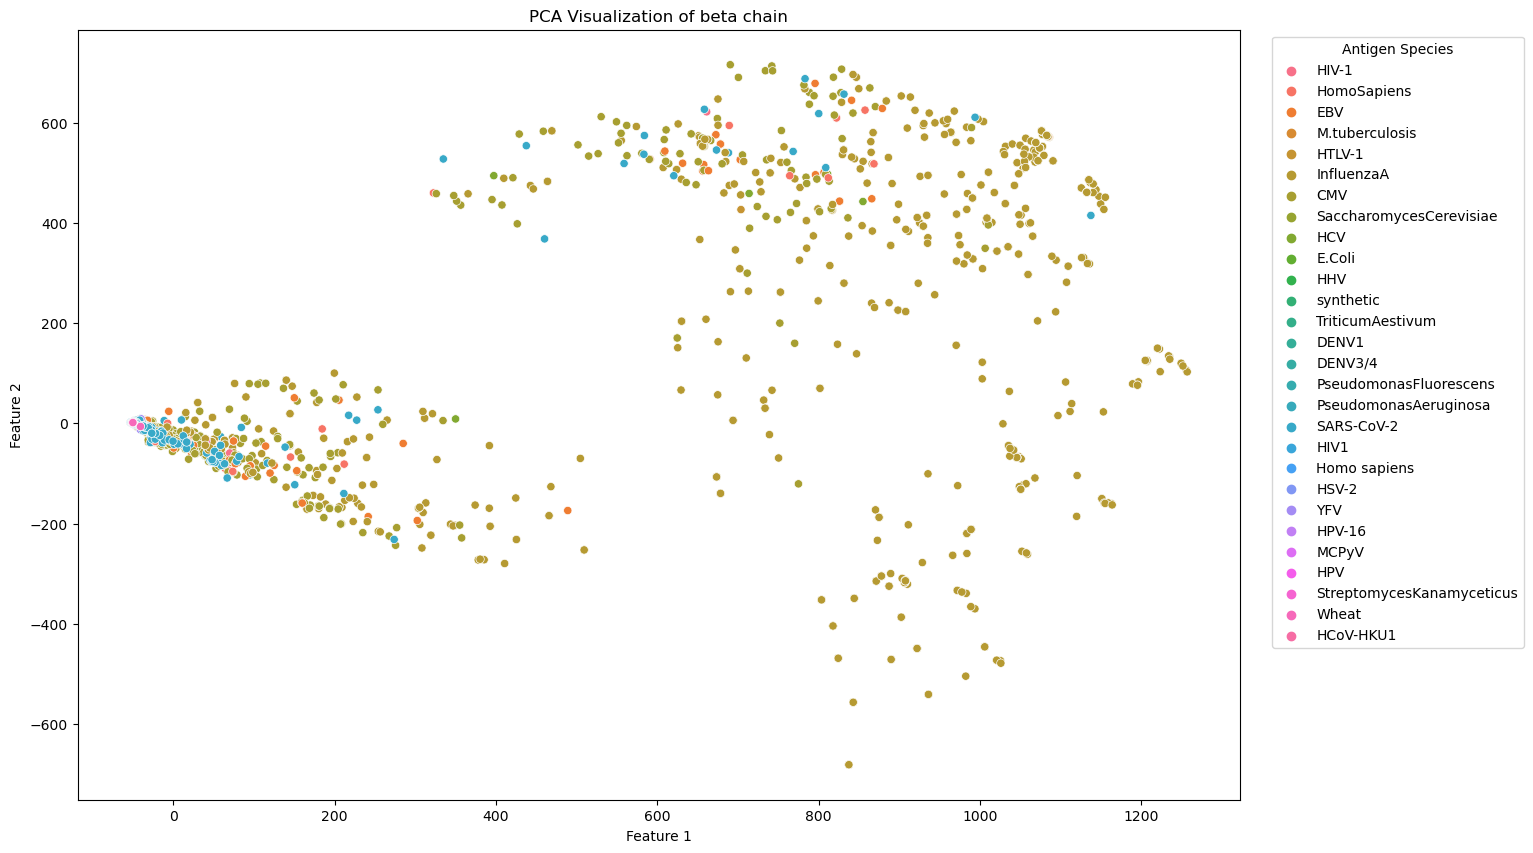

In [100]:
fig1, ax1 = plt.subplots(figsize=(15, 10))

# PCA Visualization of alpha chain
sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1], hue=df_alpha['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('PCA Visualization of alpha chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 10))

# PCA Visualization of beta chain
sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['antigen.species'], ax=ax2)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('PCA Visualization of beta chain')
ax2.legend(loc='upper right',bbox_to_anchor=(1.25,1), title='Antigen Species')

plt.show()

In [101]:
A_pca.shape


(27638, 2)

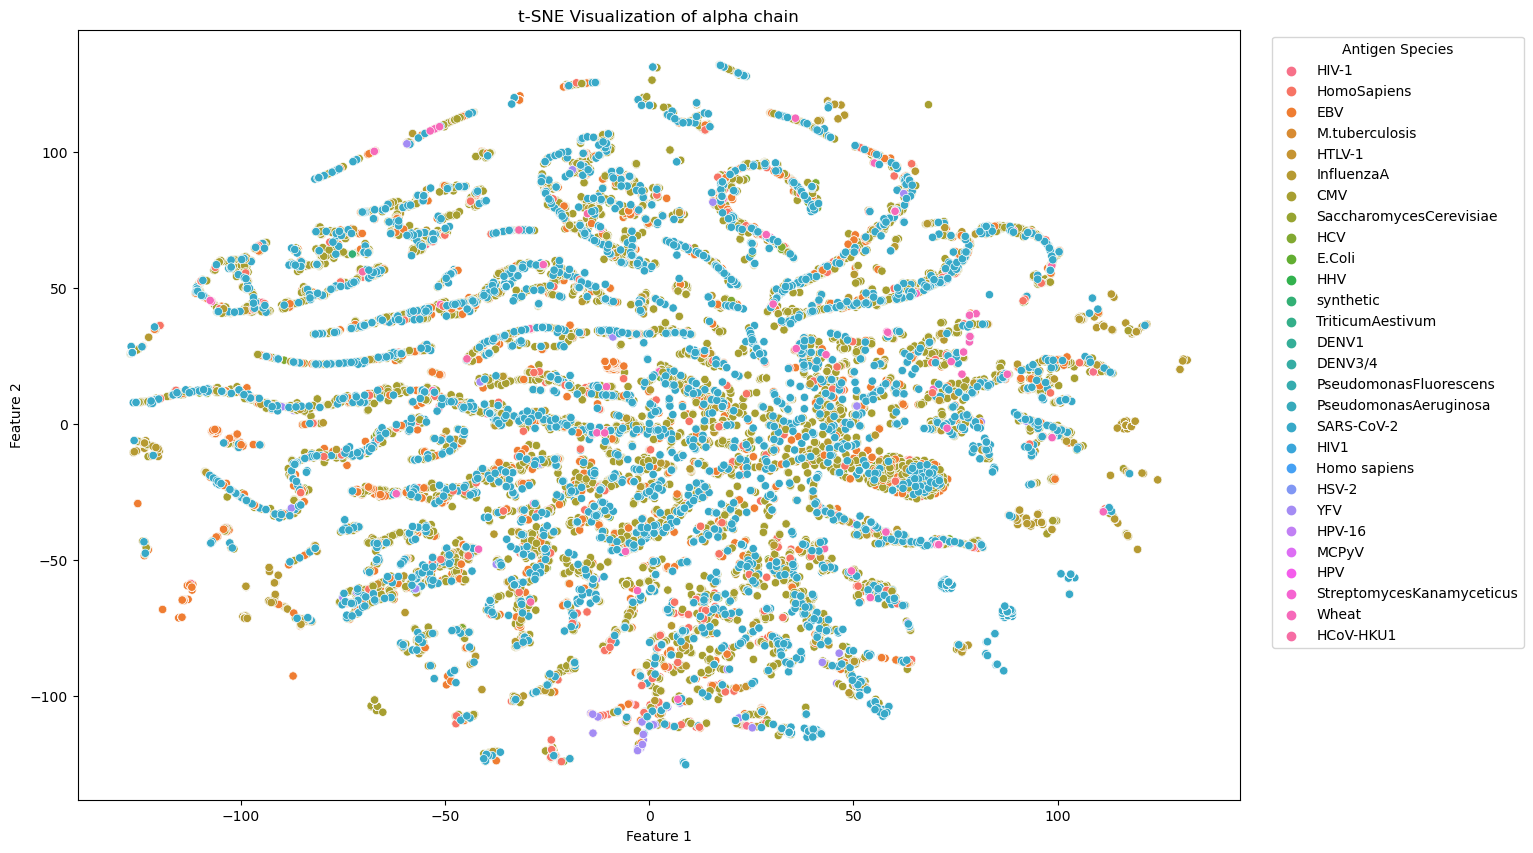

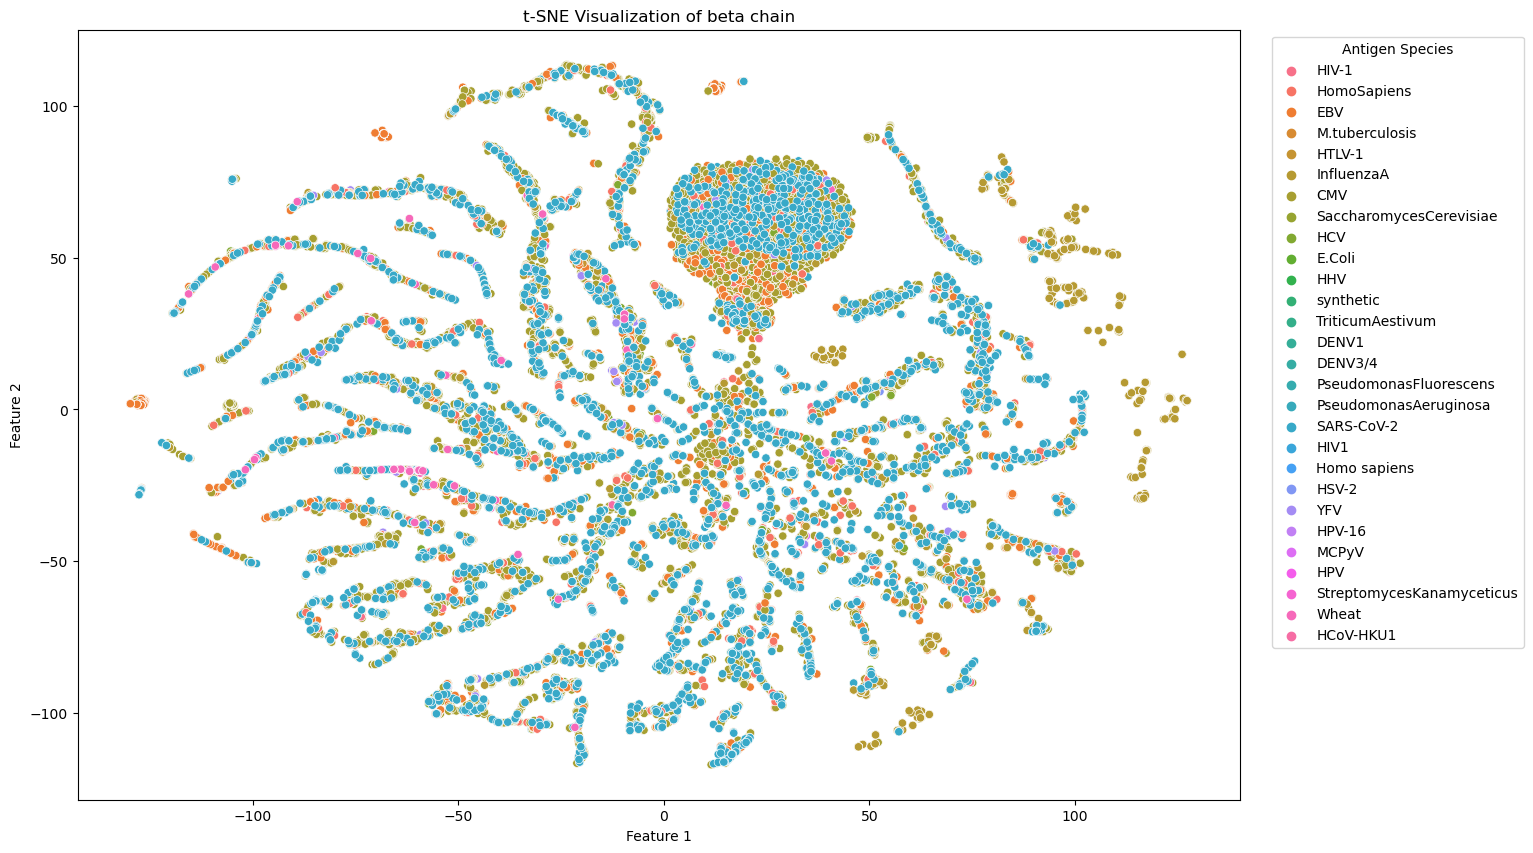

In [102]:
# t-SNE Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('t-SNE Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('t-SNE Visualization of beta chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

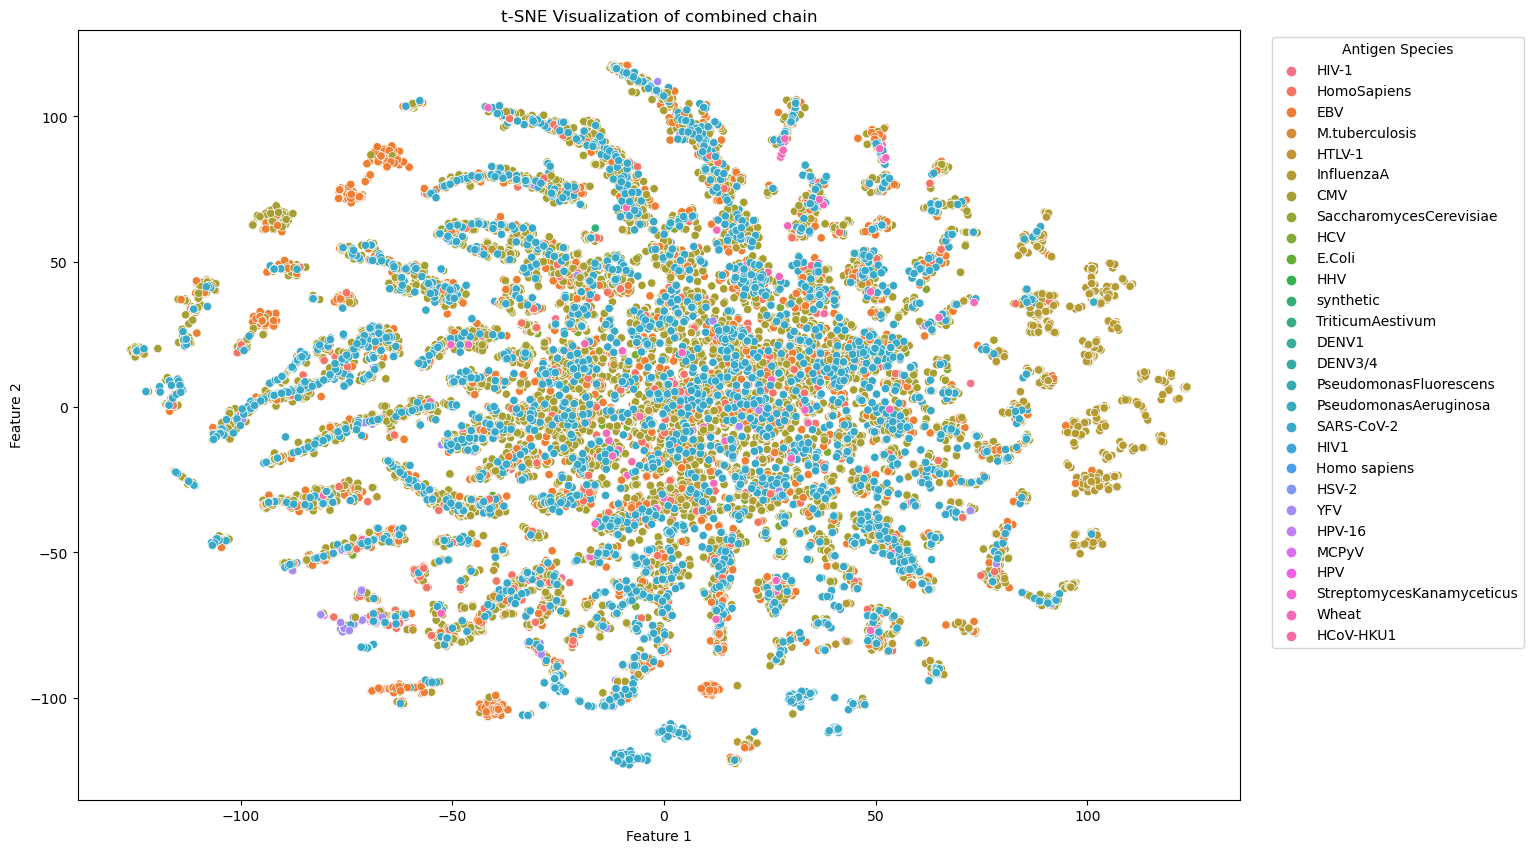

In [103]:
# t-SNE Visualization for combined chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('t-SNE Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

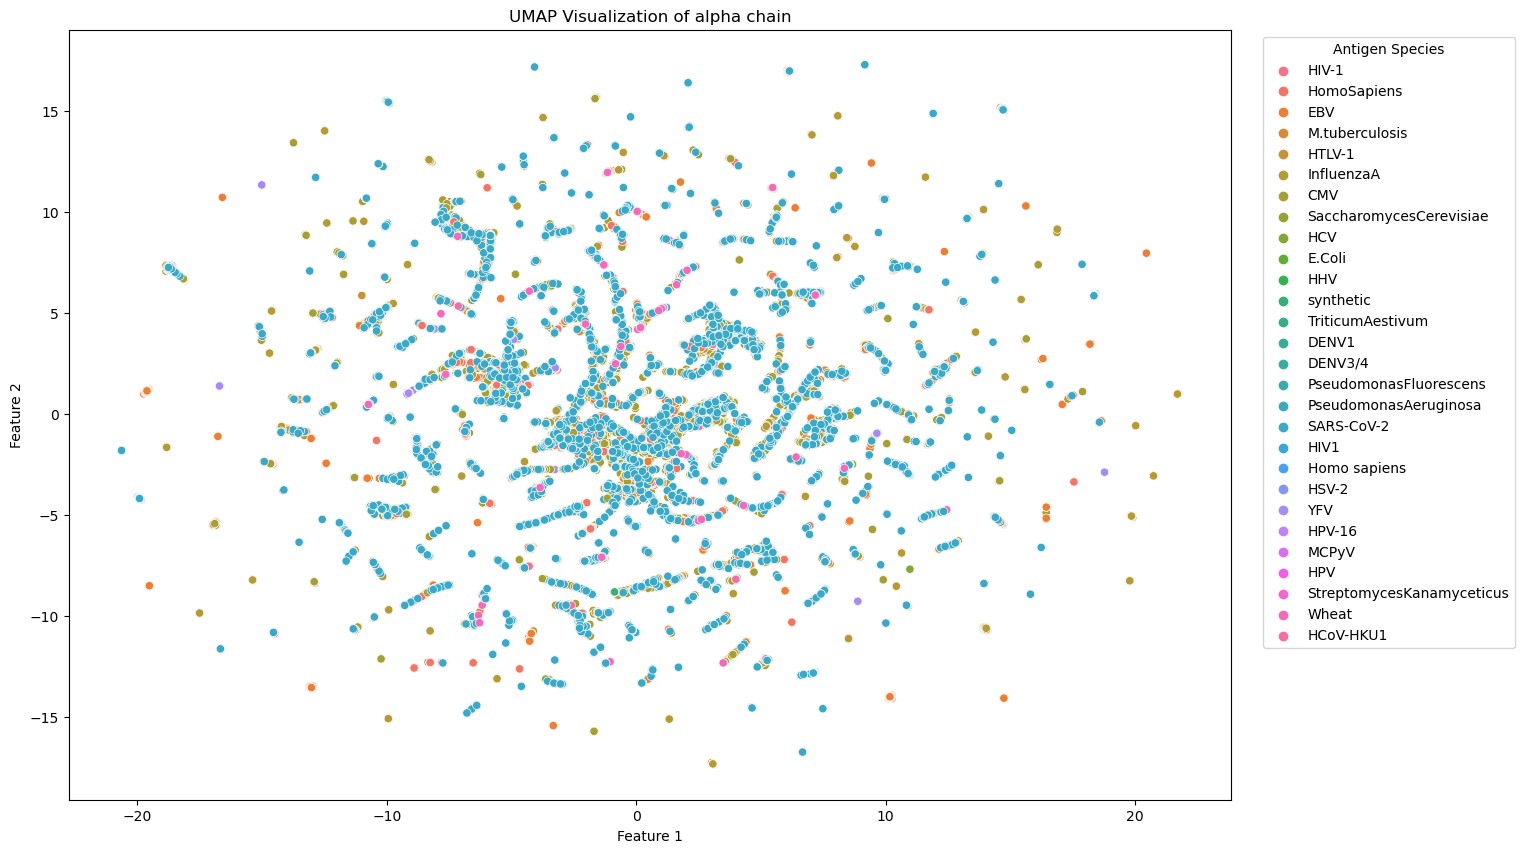

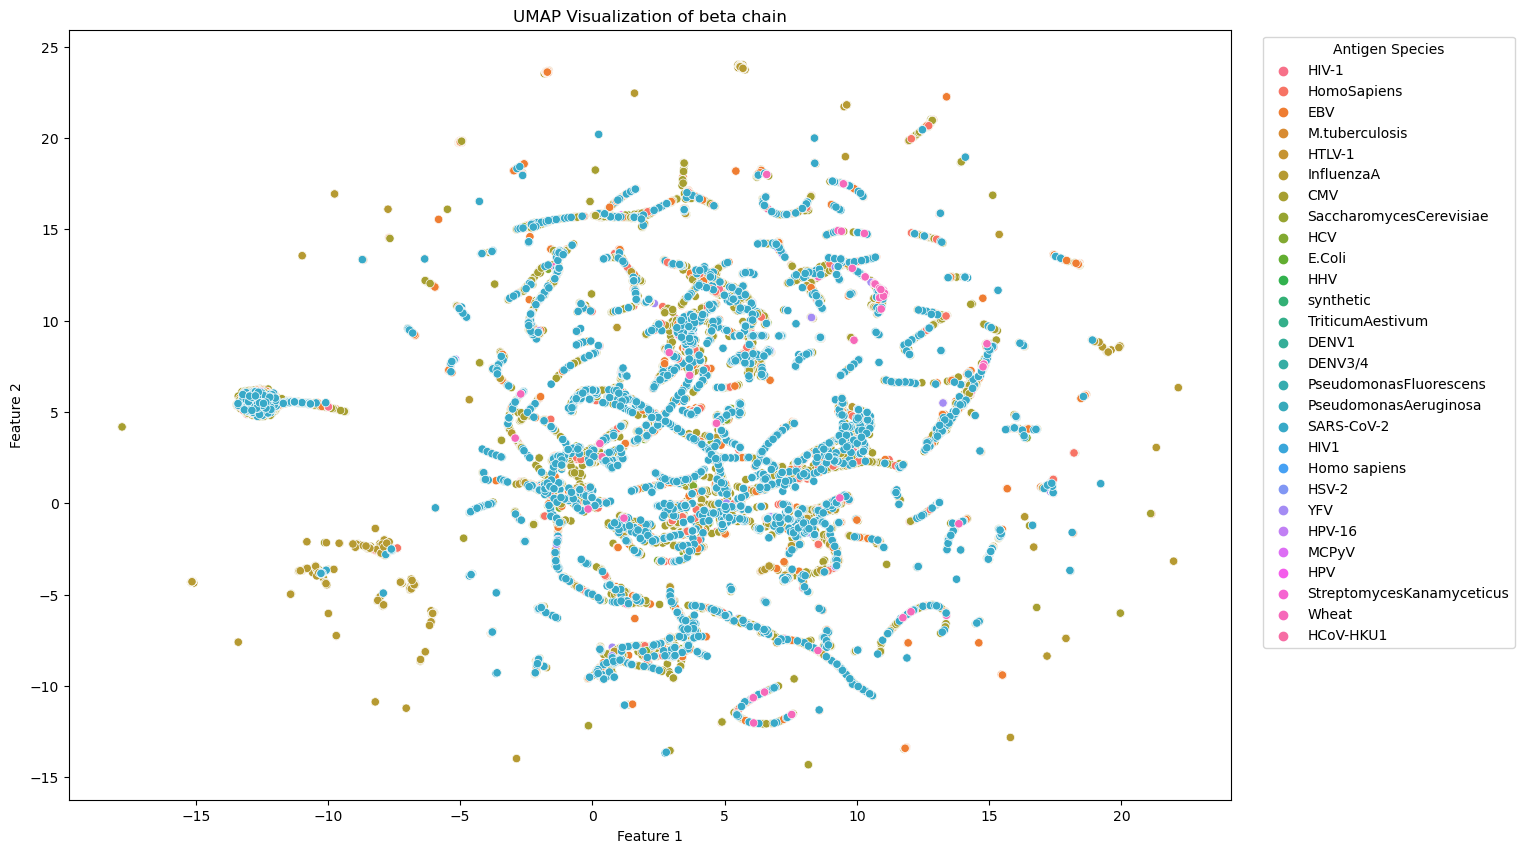

In [104]:
# UMAP Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=A_umap[:, 0], y=A_umap[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('UMAP Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=B_umap[:, 0], y=B_umap[:, 1], hue=df_beta['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('UMAP Visualization of beta chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

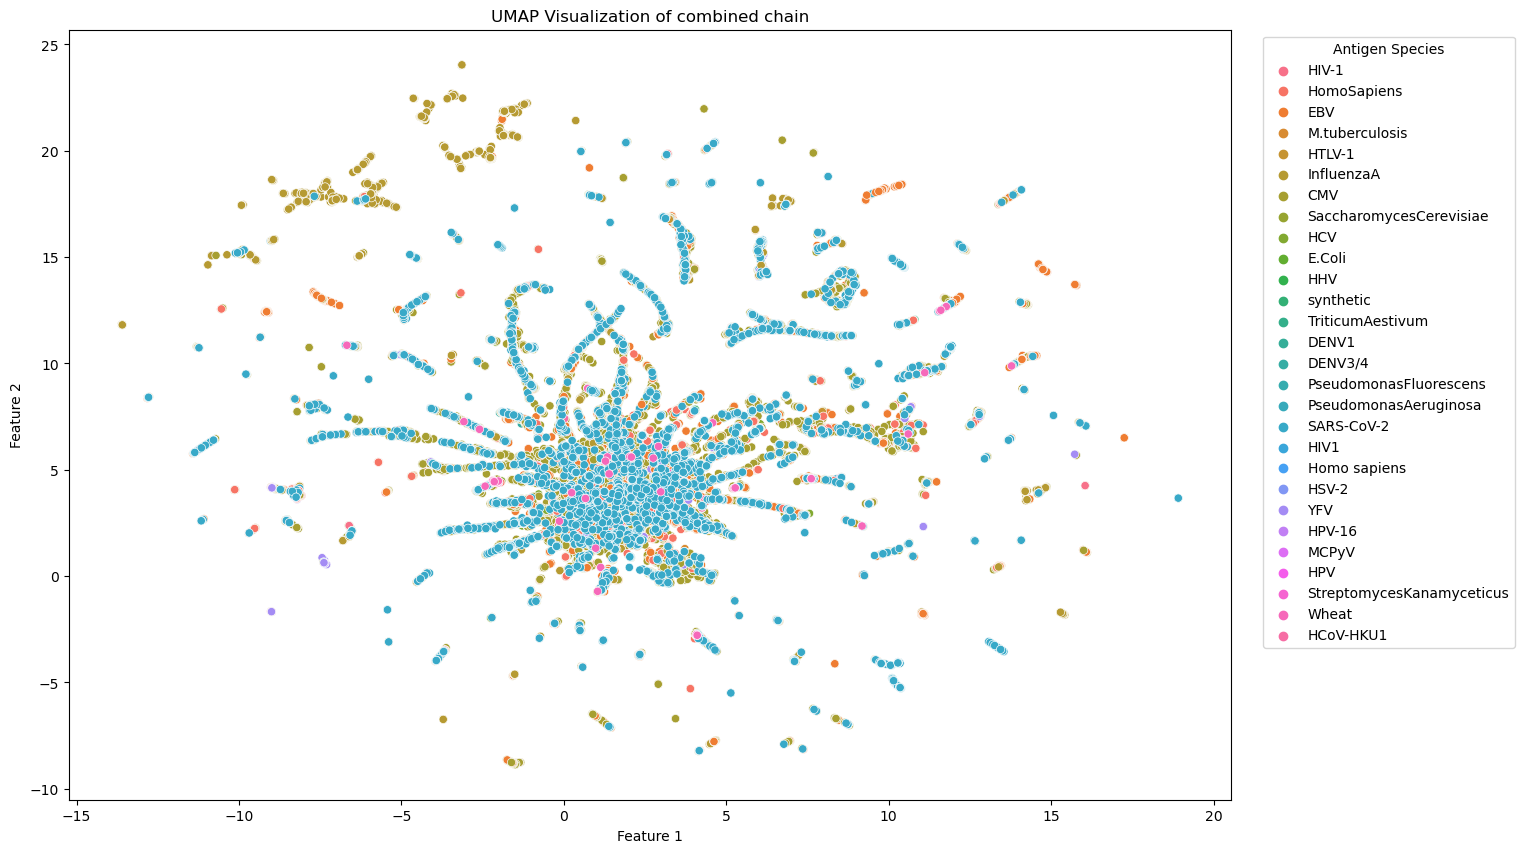

In [105]:
# UMAP Visualization for combined chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=C_umap[:, 0], y=C_umap[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('UMAP Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [106]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy